In [2]:
import pandas as pd
import numpy as np

In [10]:
# Load the sample dataset
df = pd.read_csv('/content/glass.csv', header=8)  # Replace with your path

# Convert columns to numeric, coercing errors to NaN
for col in df.columns:
    if col != 'Type':  # Assuming 'Type' is the target variable and not numeric
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [4]:
df.head()

Prepare a model for glass classification using Random Forest
0                                  Data Description:          
1                              RI : refractive index          
2  Na: Sodium (unit measurement: weight percent i...          
3                                      Mg: Magnesium          
4                                       AI: Aluminum

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 1 columns):
 #   Column                                                        Non-Null Count  Dtype 
---  ------                                                        --------------  ----- 
 0   Prepare a model for glass classification using Random Forest  18 non-null     object
dtypes: object(1)
memory usage: 276.0+ bytes


In [6]:
df.isnull().sum()

Prepare a model for glass classification using Random Forest    0
dtype: int64

In [13]:
# 3. Detect outliers using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

print("\n Outliers Detected (per column):")
print(outliers)


 Outliers Detected (per column):
Ca: Calcium    0
dtype: int64


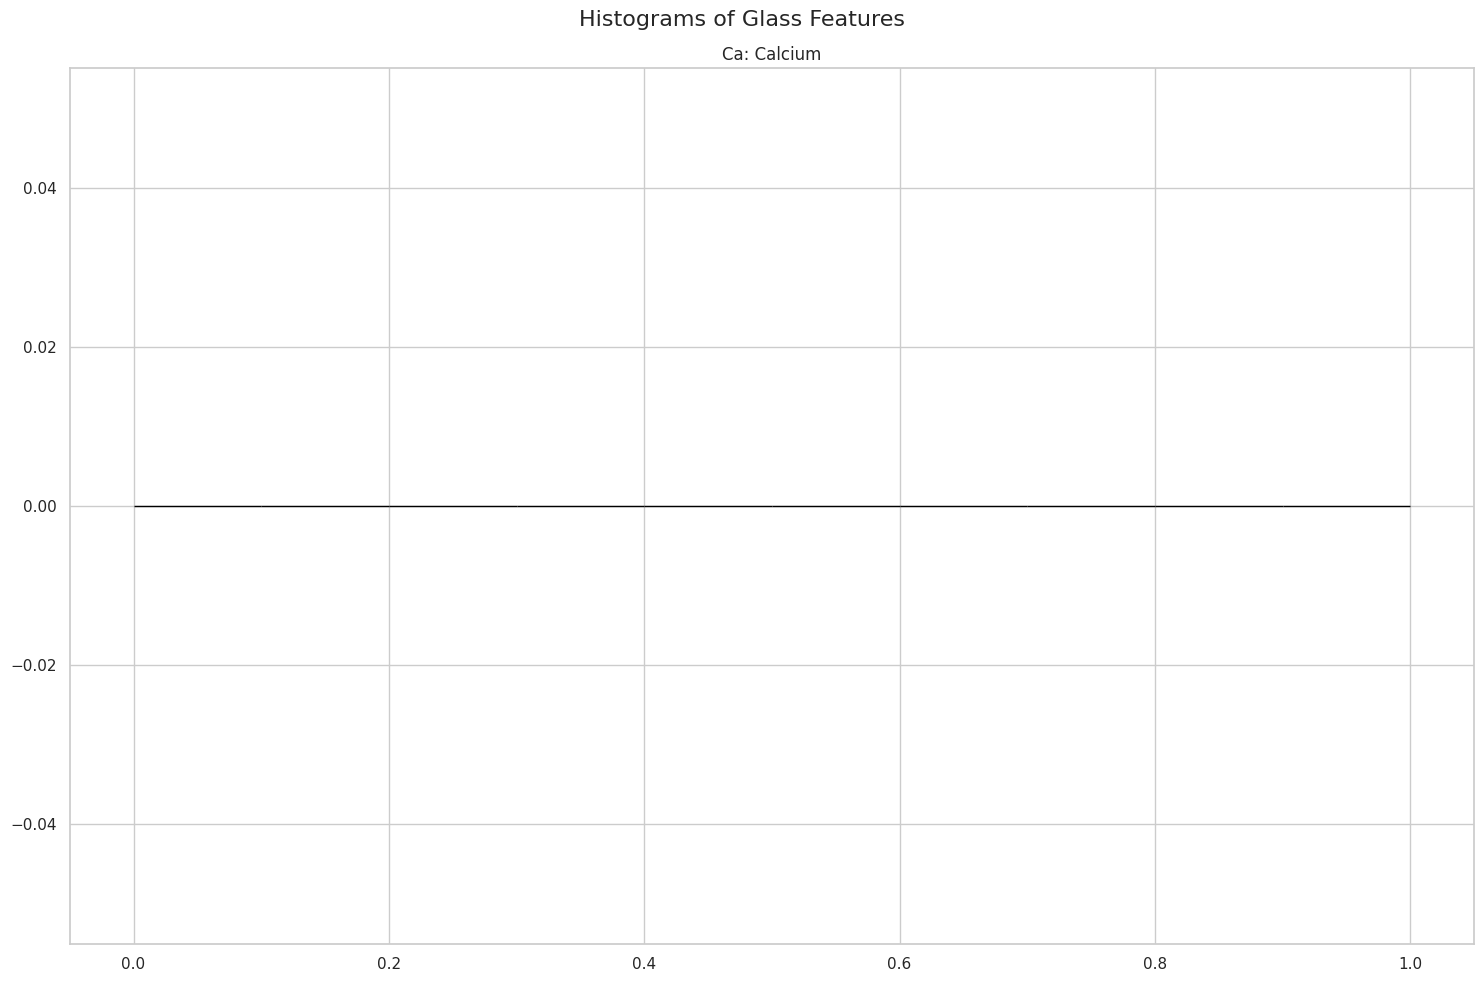

<Figure size 1500x800 with 0 Axes>

KeyError: 'Type'

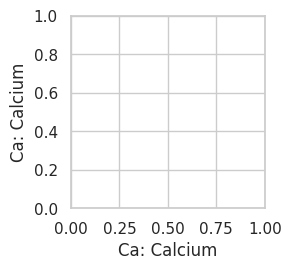

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Set a visual theme
sns.set(style="whitegrid", palette="pastel")

# 1. Histograms
df.hist(figsize=(15, 10), bins=10, edgecolor='black')
plt.suptitle("Histograms of Glass Features", fontsize=16)
plt.tight_layout()
plt.show()

# 2. Box Plots
plt.figure(figsize=(15, 8))
for i, col in enumerate(df.columns[:-1], 1):  # Exclude 'Type'
    plt.subplot(2, 5, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

# 3. Pair Plot (colored by Type)
sns.pairplot(df, hue="Type", diag_kind="kde", corner=True)
plt.suptitle("Pair Plot of Glass Features", y=1.02)
plt.show()

# 4. Correlation Heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()
